In [83]:
import numpy as np
%matplotlib inline



In [84]:
def poisson(tmax,lam):

    L=[]
    t=0

    while True:
        t+=np.random.exponential(lam)
        if t>=tmax:
            break
        L.append(t)
        
    return np.array(L)

In [184]:
pa1=poisson(60,10)
pd1=poisson(60,15)

In [92]:
def tabPeriodUntil(tempsMax,dt):
    
    L=[]
    t=0
    
    while t<=tempsMax-dt:
        t+=dt
        L.append(t)
    
    return np.array(L)

In [135]:
pa2 = tabPeriodUntil(60*5,10)
pd2 =tabPeriodUntil(60*5,15)

In [125]:
def plotprocess(p, label=None):
    x = np.concatenate(([0.0], p))
    y = np.arange(0,len(x))
    plt.step(x,y,where = "post", label=label)
    plt.xlabel("time(s)")
    plt.ylabel("number of clients")

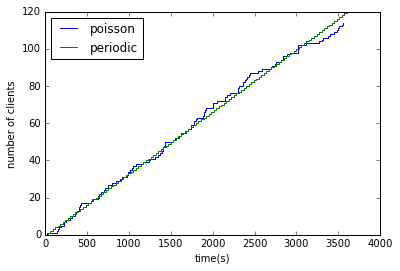

In [134]:
p1=poisson(60*60,30)
p2 = tabPeriodUntil(60*60,30)
plotprocess(p1, label="poisson")
plotprocess(p2, label="periodic")
plt.legend(loc='upper left')
plt.show()

In [188]:
pa1,pd1


(array([  0.85693473,   3.62798533,   4.31110505,  11.05578478,
         16.30810884,  20.3719964 ,  34.22078671,  52.90130231]),
 array([ 10.24966073,  30.77456732]))

In [189]:
def nb_clients(tmax,lam):
    i=0
    j=0
    a=pa1
    b=pd1
    clients=0
    while i<min(len(a),len(b))-1 or j<min(len(a),len(b))-1:
        if a[i]<b[j]:
            clients+=1
            i=i+1
        else:
            clients-=1
            j=j+1
        if clients<0:
            clients=0
    clients=clients+len(a)-len(b)
    
    return clients

In [190]:
nb_clients(60,10)

8